<a href="https://colab.research.google.com/github/dwds186/alphaco_test/blob/main/20241015/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EB%AA%A8%ED%98%95_%EC%98%88%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import logit

# Load the tips dataset
tips = sns.load_dataset('tips')

# Convert categorical columns to numeric using pd.get_dummies
tips['sex'] = tips['sex'].map({'Male': 1.0, 'Female': 0.0}).astype(float)
tips['smoker'] = tips['smoker'].map({'Yes': 1.0, 'No': 0.0}).astype(float)

model = logit('smoker ~ sex + total_bill', data = tips).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.660940
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                  244
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                0.005541
Time:                        02:30:30   Log-Likelihood:                -161.27
converged:                       True   LL-Null:                       -162.17
Covariance Type:            nonrobust   LLR p-value:                    0.4072
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8552      0.351     -2.435      0.015      -1.544      -0.167
sex           -0.0422      0.

In [2]:
model = logit('smoker ~ sex + total_bill', data = tips).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.660940
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                 smoker   No. Observations:                  244
Model:                          Logit   Df Residuals:                      241
Method:                           MLE   Df Model:                            2
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                0.005541
Time:                        02:30:30   Log-Likelihood:                -161.27
converged:                       True   LL-Null:                       -162.17
Covariance Type:            nonrobust   LLR p-value:                    0.4072
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.8552      0.351     -2.435      0.015      -1.544      -0.167
sex           -0.0422      0.

## 가설검정
- 귀무가설 : sex와 total_bill이 smoker 여부에 영향을 미치지 않는다.
- 대립가설 : sex와 total_bill이 smoker 여부에 영향을 미친다

## 오즈비 계산

In [3]:
import numpy as np

print(model.params['sex'])
print(np.exp(model.params['sex']))

-0.042220512282435015
0.9586583613197402


In [4]:
print(model.params['total_bill'])
print(np.exp(model.params['total_bill']))

0.019936522920471194
1.020136582680485


# 데이터 불러오기

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# eel 데이터셋 활용

## 데이터 가져오기

In [7]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/'

eel = pd.read_csv(DATA_PATH + "eel.csv")
eel.head()

,id,cured,intervention,duration
0,ga442,Not cured,No treatment,7
1,y024o,Not cured,No treatment,7
2,9k65h,Not cured,No treatment,6
3,lqx1y,Cured,No treatment,8
4,p7415,Cured,Intervention,7


In [8]:
# Map the categorical columns to numeric values
eel['cured'] = eel['cured'].map({'Cured': 1.0, 'Not cured': 0.0})
eel['intervention'] = eel['intervention'].map({'Intervention': 1.0, 'No treatment': 0.0})

eel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            113 non-null    object 
 1   cured         113 non-null    float64
 2   intervention  113 non-null    float64
 3   duration      113 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 3.7+ KB


## 기저모형 만들기

In [10]:
model1 = logit('cured ~ 1', data=eel).fit()
print(model1.summary())

Optimization terminated successfully.
         Current function value: 0.681788
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  cured   No. Observations:                  113
Model:                          Logit   Df Residuals:                      112
Method:                           MLE   Df Model:                            0
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:               2.761e-13
Time:                        02:31:46   Log-Likelihood:                -77.042
converged:                       True   LL-Null:                       -77.042
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3032      0.190      1.593      0.111      -0.070       0.676


## 새모형 만들기

In [9]:
model2 = logit('cured ~ intervention', data=eel).fit()
print(model2.summary())

Optimization terminated successfully.
         Current function value: 0.637866
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  cured   No. Observations:                  113
Model:                          Logit   Df Residuals:                      111
Method:                           MLE   Df Model:                            1
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.06442
Time:                        02:31:44   Log-Likelihood:                -72.079
converged:                       True   LL-Null:                       -77.042
Covariance Type:            nonrobust   LLR p-value:                  0.001629
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.2877      0.270     -1.065      0.287      -0.817       0.242
intervention     1.2287

## 잔차 이탈도 계산

In [11]:
print(model1.llf) # 로그가능도 or 로그우도
print(-2 * model1.llf) # wks

-77.0420024476993
154.0840048953986


In [12]:
print(model2.llf) # 로그가능도 or 로그우도
print(-2 * model2.llf)

-72.07890183908266
144.15780367816532


In [13]:
import scipy.stats as stats

def calculate_p_value(chi_square_score, degrees_of_freedom):
    """
    Function to compute the p-value from a chi-square score.

    Parameters:
    chi_square_score: the chi-square statistic
    degrees_of_freedom: the degrees of freedom (number of categories - 1)

    Returns:
    p_value: the p-value corresponding to the chi-square score
    """
    # Calculate the p-value
    p_value = 1 - stats.chi2.cdf(chi_square_score, degrees_of_freedom)
    return p_value

# Given chi-square score and degrees of freedom
chi_square_score = -2 * model1.llf - -2 * model2.llf
print(chi_square_score)
degrees_of_freedom = 1  # Adjust this based on your specific test setup

# Calculate the p-value
p_value = calculate_p_value(chi_square_score, degrees_of_freedom)
print(f"P-Value: {p_value}")

9.926201217233285
P-Value: 0.0016294247429310404


# cleaned_loan_data 데이터셋 활용

In [15]:
import pandas as pd

DATA_PATH = '/content/drive/MyDrive/Colab Notebooks/2024_2025/imbank/dataset/'

loan_data = pd.read_csv(DATA_PATH + "cleaned_loan_data.csv")
loan_data.head()

,loan_status,loan_amnt,grade,home_ownership,annual_inc,age,emp_cat,ir_cat
0,0,5000,B,RENT,24000.0,33,0-15,8-11
1,0,2400,C,RENT,12252.0,31,15-30,Missing
2,0,10000,C,RENT,49200.0,24,0-15,11-13.5
3,0,5000,A,RENT,36000.0,39,0-15,Missing
4,0,3000,E,RENT,48000.0,24,0-15,Missing


## 모형 만들기
- loan_status: 종속 변수로, 0 또는 1로 나타나며, 로지스틱 회귀의 목표 변수가 될 수 있습니다.
- loan_amnt: 대출 금액.
grade: 대출 등급을 나타내는 범주형 변수입니다.
- home_ownership: 주택 소유 유형 (예: 임대).
- annual_inc: 대출자의 연간 소득.
age: 대출자의 나이.
- emp_cat: 고용 카테고리 (근무 연수 범위).
- ir_cat: 이자율 카테고리.

<Axes: xlabel='grade', ylabel='count'>

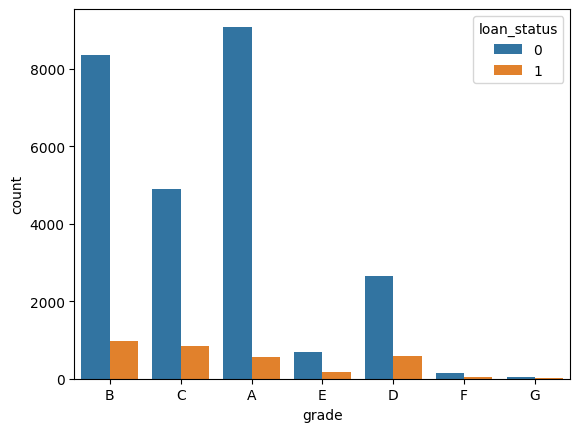

In [16]:
# Create a count plot for loan_status and grade
sns.countplot(x='grade', hue='loan_status', data=loan_data)

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

loan_data['grade'] = loan_data['grade'].astype('category')
model = logit('loan_status ~ grade', data=loan_data).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.337297
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                29091
Model:                          Logit   Df Residuals:                    29084
Method:                           MLE   Df Model:                            6
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                 0.03201
Time:                        02:32:50   Log-Likelihood:                -9812.3
converged:                       True   LL-Null:                       -10137.
Covariance Type:            nonrobust   LLR p-value:                6.388e-137
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.7774      0.043    -64.057      0.000      -2.862      -2.692
grade[T.B]     0.6408      0.

## 오즈비 구하기
- coefficient : 로지스틱 회귀분석의 회귀계수
- Odds Ration : 승산비

In [18]:
odds_ratios = pd.DataFrame({
    'coefficient': model.params,
    'Odds Ratio': model.params.apply(np.exp)
})

odds_ratios

,coefficient,Odds Ratio
Intercept,-2.777444,0.062197
grade[T.B],0.640788,1.897976
grade[T.C],1.017994,2.767638
grade[T.D],1.257780,3.517604
grade[T.E],1.408342,4.089171
grade[T.F],1.759371,5.808781
grade[T.G],2.266619,9.646726


- 해석 G등급에 가까울수록 대출 완납 기대하기 어렵기 때문에 G등급에 속한 사람에게는 보수적으로 대출 진행 필요

# 실습
- 연구논문 (Cooper et., al. 2007. Chat-up lines as male displays: Effects of connect, sex, and personality. Personality and Individual Differences, 43(5), 1075-1085.
- 처음 보는 상대방의 관심을 얻기 위해 사용하는 대화문을 평가하는 방식에 관한 연구
-  나이트클럽 / 남자 348명, 여자 672명 / 판정단이 대화내용 판단 후 결과 체크

## 데이터 불러오기

In [20]:
# Re-importing necessary libraries to handle the new dataset
import pandas as pd

file_path_chatup = DATA_PATH + 'Chat-Up Lines.dat'
chatup_data = pd.read_csv(file_path_chatup, delimiter='\t')  # Assuming

chatup_data.head()

,Success,Funny,Sex,Good_Mate,Gender
0,Get Phone Number,3,7,6,Male
1,Go Home with Person,5,7,2,Male
2,Get Phone Number,4,6,6,Male
3,Go Home with Person,3,7,5,Male
4,Get Phone Number,5,1,6,Male


## 모형 만들기
- 유쾌한 R통계학 교재 보고 해석
  + p441~p445

In [21]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import mnlogit
import numpy as np

chatup_data['Success_cat'] = chatup_data['Success'].astype('category').cat.codes

chatup_data.head()

,Success,Funny,Sex,Good_Mate,Gender,Success_cat
0,Get Phone Number,3,7,6,Male,0
1,Go Home with Person,5,7,2,Male,1
2,Get Phone Number,4,6,6,Male,0
3,Go Home with Person,3,7,5,Male,1
4,Get Phone Number,5,1,6,Male,0


In [22]:
model = mnlogit('Success_cat ~ Good_Mate + Funny + C(Gender) + Sex + C(Gender):Sex + Funny:C(Gender)', data=chatup_data).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.851702
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:            Success_cat   No. Observations:                 1020
Model:                        MNLogit   Df Residuals:                     1006
Method:                           MLE   Df Model:                           12
Date:                Tue, 15 Oct 2024   Pseudo R-squ.:                  0.1382
Time:                        02:35:00   Log-Likelihood:                -868.74
converged:                       True   LL-Null:                       -1008.0
Covariance Type:            nonrobust   LLR p-value:                 1.496e-52
          Success_cat=1       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -6.4835      1.035     -6.265      0.000      -8.512   

## 결과 해석